In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 데이터 로딩

In [2]:
# city to region
def get_region_from_city(city):
    if (city[:2] in '서울 경기 인천 안산 파주 용인 하남 수원 의왕 고양'.split() or city[:3] in ['의정부']):
        return 1
    elif city[:2] in '대구 부산 충남 경상 부산 대구 충청 천안'.split():
        return 0
    else:
        raise

In [3]:
# load data
df_raw = pd.read_csv("./survey data.csv", encoding='utf-8')

# define data table columns
df = df_raw[['name']]

# basic (demographic)
df['sex'] = df_raw['sex'].apply(lambda x: {'남성': 0, '여성': 1}[x])

df['age'] = df_raw['age']
cities = df_raw['address'].str.split(" ").str.get(0)
df['urban'] = cities.map(lambda x: get_region_from_city(x))

# basic (delivery membership)
df['membership'] = df_raw['membership'].apply(lambda x: {'아니오': 0, '네': 1}[x])
df['preferType'] = df_raw['preferType'].apply(lambda x: {'일반배송': 0, '빠른배송': 1}[x]) # 과거 선호배송유형(주관)
df['selectType'] = df_raw['selectType'].apply(lambda x: {'일반배송': 0, '빠른배송': 1}[x]) # 미래 선호배송유형(주관)
df['deliveryFeeWillingToPay'] = df_raw['willingToPay'] # 일반배송 선택한 경우, 빠른 배송을 이용하기 위해 지불할 용의가 있는 최소 배송료 금액

# basic (behavior)
df['orderCycle'] = df_raw['frequency'] # 주문 주기 (주단위)
df['remainder'] = df_raw['remainder'] # 구매전 잔여개수
df['orderQuantity'] = df_raw['orderQuantity'] # 1회주문량 (장단위)

# order history

for i in range(1, 6):
    df['date' + str(i)] = pd.to_datetime(df_raw['date' + str(i)], format='%Y.%m.%d')
    df['quantity' + str(i)] = df_raw['quantity' + str(i)]
    df['deliveryType' + str(i)] = df_raw['type' + str(i)].apply(
        lambda x: {'일반배송': 0, '빠른배송': 1}[x] if pd.notnull(x) else x)
    df['deliveryFee' + str(i)] = df_raw['charge' + str(i)]

df.head().T

,0,1,2,3,4
name,김은미,정민주,김솔,김경표,이윤지
sex,1,1,1,0,1
age,33,21,20,22,21
urban,1,1,1,1,1
membership,0,1,1,1,0
preferType,0,1,0,1,0
selectType,0,1,0,0,0
deliveryFeeWillingToPay,0.0,1000.0,4000.0,4000.0,3500.0
orderCycle,12,4,12,8,16
remainder,20,20,10,5,10


- 일부 날짜입력오류 존재 가능성 있음 --> 영수증 내역 확인 필요

In [4]:
# manual correction
print(df.loc[df.name == '노경은', ['date1', 'date2', 'date3', 'date4', 'date5']])
print(df.loc[df.name == '노경은', ['quantity' + str(i) for i in range(1,6)]])
df.loc[df.name == '노경은', 'date3'] = pd.to_datetime('2020-07-22', format='%Y-%m-%d')
print(df.loc[df.name == '노경은', ['date1', 'date2', 'date3', 'date4', 'date5']])

       date1      date2      date3 date4 date5
6 2021-04-07 2021-03-17 2019-07-22   NaT   NaT
   quantity1  quantity2  quantity3  quantity4  quantity5
6        100        100      100.0        NaN        NaN
       date1      date2      date3 date4 date5
6 2021-04-07 2021-03-17 2020-07-22   NaT   NaT


In [5]:
# manual correction
print(df.loc[df.name == '박지혜', ['date1', 'date2', 'date3', 'date4', 'date5']])
print(df.loc[df.name == '박지혜', ['quantity' + str(i) for i in range(1,6)]])
df.loc[df.name == '박지혜', 'date3'] = pd.to_datetime('2020-01-14', format='%Y-%m-%d')
print(df.loc[df.name == '박지혜', ['date1', 'date2', 'date3', 'date4', 'date5']])

        date1      date2      date3 date4 date5
31 2021-05-04 2020-08-31 2019-01-14   NaT   NaT
    quantity1  quantity2  quantity3  quantity4  quantity5
31         30        100       20.0        NaN        NaN
        date1      date2      date3 date4 date5
31 2021-05-04 2020-08-31 2020-01-14   NaT   NaT


In [6]:
# 코로나 확진자수 로딩
df_covid = pd.read_csv('./covidcases.csv')
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid.head()

,date,case
0,2020-01-20,1
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,1


In [7]:
# 데이터 augmentation 수행 (non-buy 데이터 생성)

basecols = list(df.columns[:11])
print(basecols)

end_date = df[['date' + str(i) for i in range(1, 6)]].max().max()
print(end_date)

n_list = [1, 7, 14, 30, 60, 90]
df_augmented = pd.DataFrame(columns=basecols + ['date', 'quantity', 'deliveryType', 'deliveryFee'] + ['n=%d'%n for n in n_list] + ['last_ordered_quantity', 'days_after_last_order'])

for _, row in df.iterrows():
    date = row[['date' + str(i) for i in range(1, 6)]].values
    quantity = row[['quantity' + str(i) for i in range(1, 6)]].values
    dtype = row[['deliveryType' + str(i) for i in range(1, 6)]].values
    dfee = row[['deliveryFee' + str(i) for i in range(1, 6)]].values
    df_orig = pd.DataFrame({'date': date, 
                            'quantity': quantity, 
                            'deliveryType': dtype, 
                            'deliveryFee': dfee}).dropna()

    df_tmp = pd.DataFrame(
        {'date': pd.date_range(start=df_orig.date.min(), end=end_date, freq='D')})
    df_tmp = df_tmp.merge(df_orig, how='left', on='date')
    df_tmp['last_ordered_quantity'] = df_tmp['quantity'].ffill().shift(1).fillna(0)
    df_tmp = df_tmp.fillna(0)
    buy = (df_tmp['quantity'] > 0)
    g = (buy != buy.shift()).cumsum()
    df_tmp['days_after_last_order'] = (g.groupby(g).cumcount() + 1).shift().fillna(0)
    df_tmp[basecols] = row[basecols]
    for n in n_list:
        df_tmp['n=%d'%n] = df_tmp.quantity.rolling(window=n, min_periods=1).sum().shift(1)
    df_tmp = df_tmp[df_augmented.columns]
    df_augmented = pd.concat([df_augmented, df_tmp], axis=0)

df_augmented['date'] = pd.to_datetime(df_augmented['date'])
df_augmented['year'] = df_augmented['date'].dt.year
df_augmented['month'] = df_augmented['date'].dt.month
df_augmented['weeknumber'] = df_augmented['date'].dt.isocalendar().week
df_augmented['dateindex'] = df_augmented.apply(lambda x: "{:04}{:02}_{:02}".format(x['year'], x['month'], x["weeknumber"]), axis=1)
df_augmented['buy'] = (df_augmented['quantity'] > 0).astype(int)

df_augmented = df_augmented.merge(df_covid, how='left', on='date').fillna(0)
df_augmented.to_csv('augmented_data.csv')
    
df_augmented.head(10)

['name', 'sex', 'age', 'urban', 'membership', 'preferType', 'selectType', 'deliveryFeeWillingToPay', 'orderCycle', 'remainder', 'orderQuantity']
2021-06-10 00:00:00


,name,sex,age,urban,membership,preferType,selectType,deliveryFeeWillingToPay,orderCycle,remainder,...,n=60,n=90,last_ordered_quantity,days_after_last_order,year,month,weeknumber,dateindex,buy,case
0,김은미,1,33,1,0,0,0,0.0,12,20,...,0.0,0.0,0.0,0.0,2020,12,51,202012_51,1,1078.0
1,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,1.0,2020,12,51,202012_51,0,1014.0
2,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,1.0,2020,12,51,202012_51,0,1064.0
3,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,2.0,2020,12,51,202012_51,0,1045.0
4,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,3.0,2020,12,51,202012_51,0,1096.0
5,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,4.0,2020,12,52,202012_52,0,924.0
6,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,5.0,2020,12,52,202012_52,0,866.0
7,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,6.0,2020,12,52,202012_52,0,1090.0
8,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,7.0,2020,12,52,202012_52,0,985.0
9,김은미,1,33,1,0,0,0,0.0,12,20,...,50.0,50.0,50.0,8.0,2020,12,52,202012_52,0,1240.0


# viz

<AxesSubplot:xlabel='date', ylabel='name'>

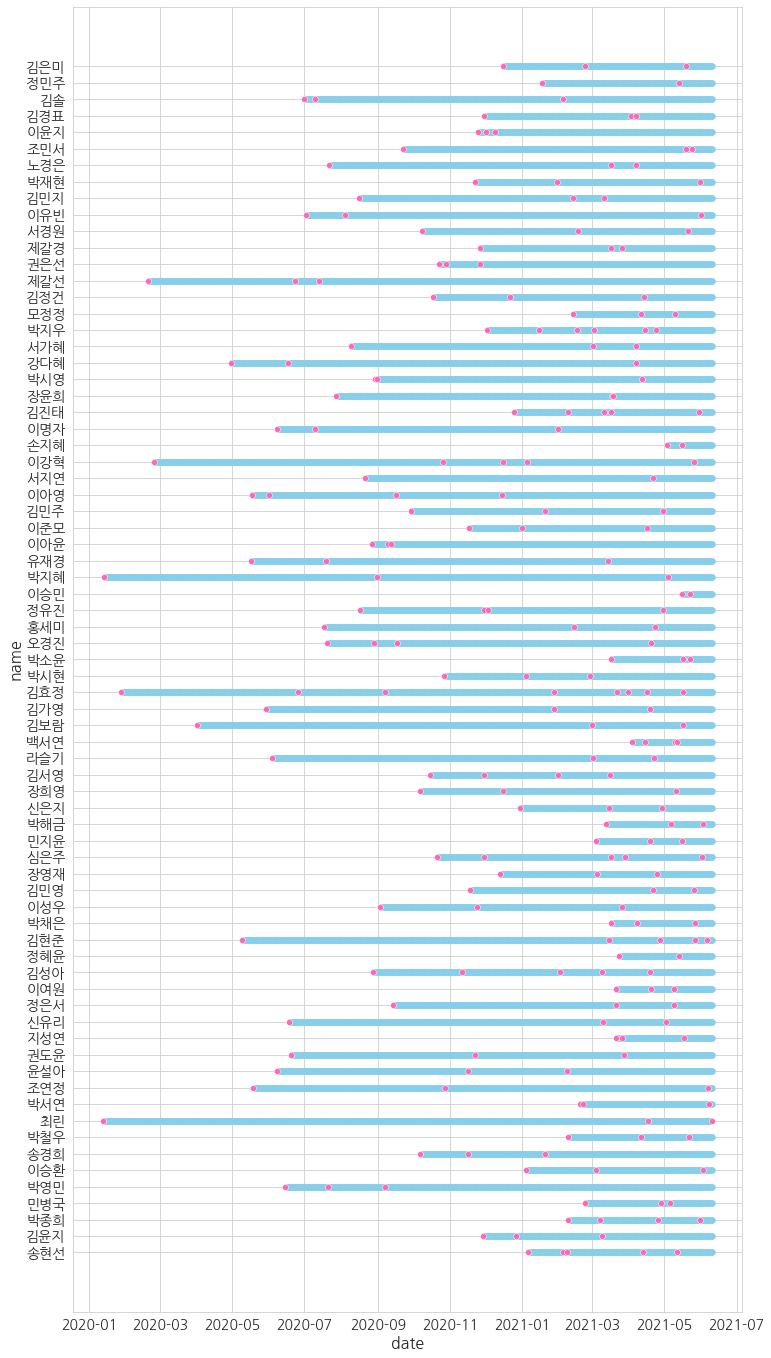

In [8]:
import seaborn as sns
# sns.set(color_codes=True)
sns.set_style("whitegrid")

from matplotlib import pyplot as plt
# 유니코드 깨짐현상 해결
plt.rcParams['axes.unicode_minus'] = False
# 그림 사이즈
plt.rcParams['figure.figsize'] = (13, 8)
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'
# 폰트 사이즈
plt.rcParams['font.size'] = 12.
# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 14.
# y축 라벨사이즈
plt.rcParams['ytick.labelsize'] = 14.
#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 16.

fig, ax = plt.subplots(figsize = (12,24))
df_tmp = df_augmented.loc[df_augmented['quantity'] == 0, ['date', 'name', 'quantity']]
sns.scatterplot(x=df_tmp['date'], y=df_tmp['name'], edgecolor=None, color='skyblue')
df_tmp = df_augmented.loc[df_augmented['quantity'] > 0, ['date', 'name', 'quantity']]
sns.scatterplot(x=df_tmp['date'], y=df_tmp['name'], color='hotpink')

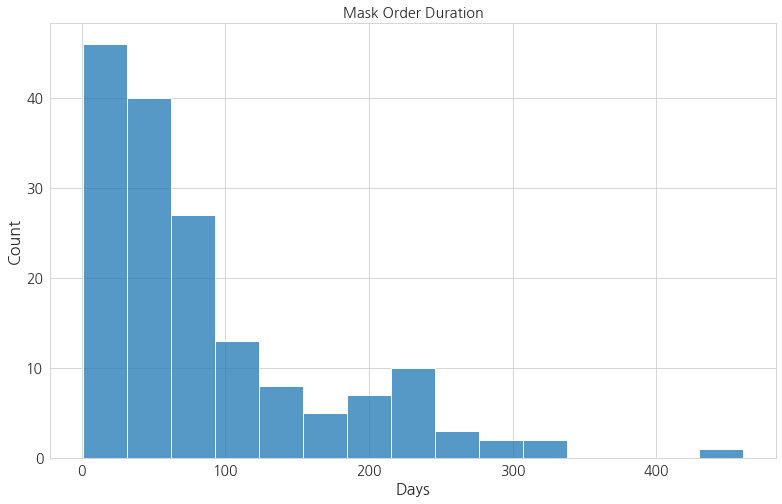

In [9]:
durations = []
for _, row in df.iterrows():
    date = np.sort(row[['date' + str(i) for i in range(1, 6)]].values)
    for i in range(4):
        try:
            durations.append((date[i+1] - date[i]).days)
        except:
            continue
sns.histplot(durations)
plt.title('Mask Order Duration')
plt.xlabel('Days')
plt.show()

In [10]:
import matplotlib.dates as mdates

In [11]:
# tmp = df_augmented[['date', 'buy']].groupby(df_augmented['date'].dt.strftime('%Y-%W'))['buy'].sum().reset_index()
tmp = df_augmented[['date', 'quantity', 'buy']].groupby('date').sum().reset_index()
tmp['dateindex'] = pd.to_datetime(tmp['date'] - tmp['date'].dt.weekday * np.timedelta64(1, 'D')) # first day of week

tmp_group = tmp[['dateindex', 'quantity', 'buy']].groupby('dateindex').sum().reset_index()
print(tmp.shape, tmp_group.shape)

(515, 4) (74, 3)


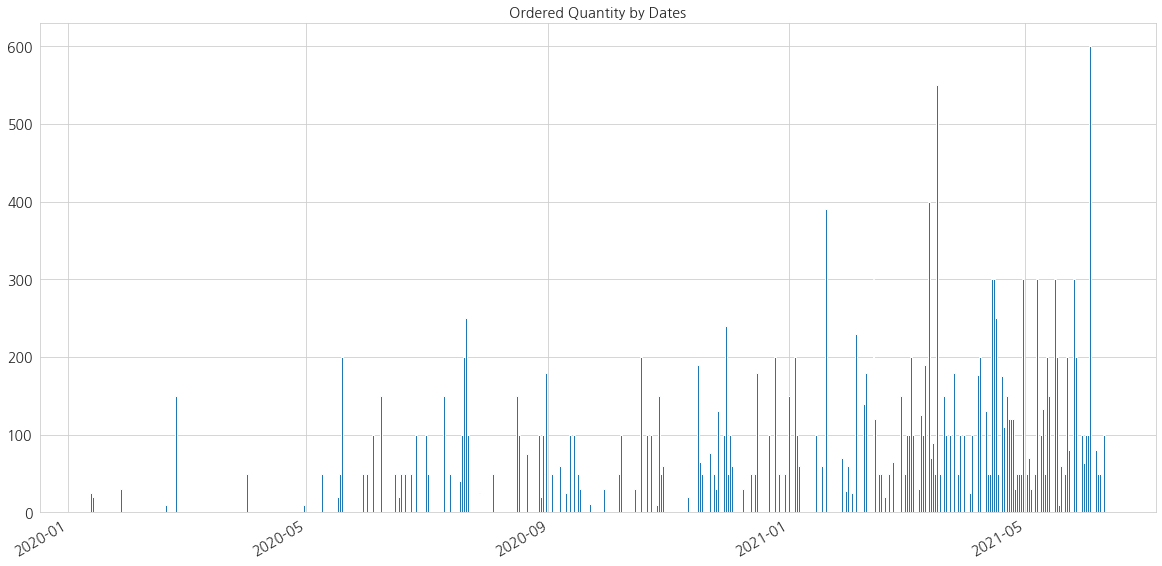

In [12]:
plt.figure(figsize = (20, 10))
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# sns.barplot(x=tmp_group['dateindex'], y=tmp_group['quantity'])
plt.bar(tmp['date'], tmp['quantity'], width=1)
plt.title('Ordered Quantity by Dates')
plt.gcf().autofmt_xdate() # Rotation
plt.show()

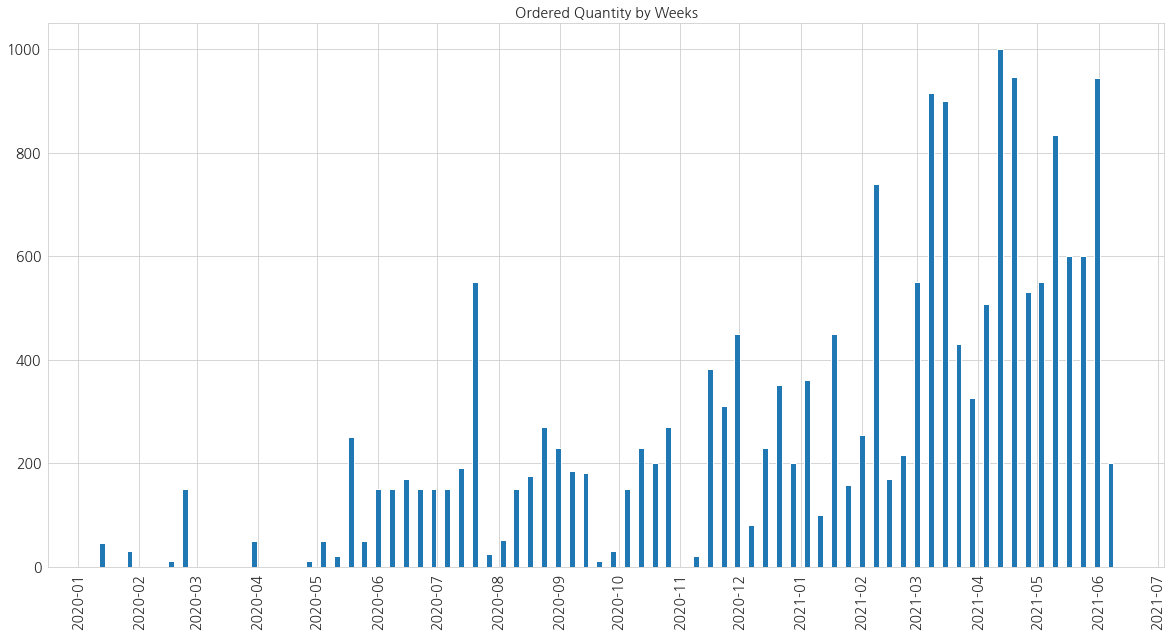

In [13]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.bar(tmp_group['dateindex'], tmp_group['quantity'], width=3)
# ax = sns.barplot(x=tmp_group['dateindex'].apply(lambda x: np.datetime64(x)), y=tmp_group['quantity'], ax=ax, color='b')
plt.xticks(rotation=90)
plt.title('Ordered Quantity by Weeks')
# xticks = ax.get_xticks()
# ax.set_xticklabels([pd.to_datetime(tm, unit='ms').strftime('%Y-%m-%d') for tm in xticks], rotation=90)
plt.show()

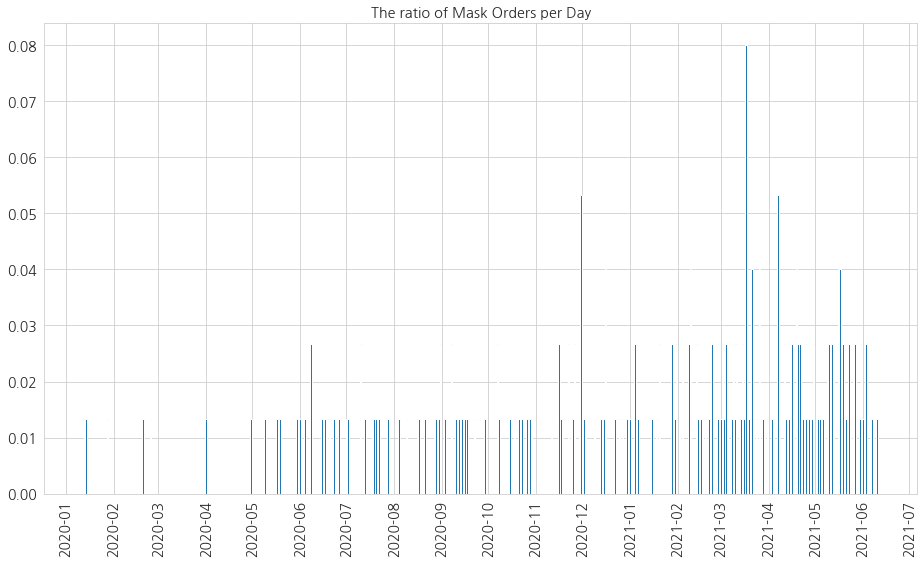

In [14]:
# fig, ax = plt.subplots(figsize = (20, 10))
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax = plt.bar(tmp['date'], tmp['buy']/len(df), width=1)
plt.xticks(rotation=90)
plt.title('The ratio of Mask Orders per Day')
plt.tight_layout()
plt.show()

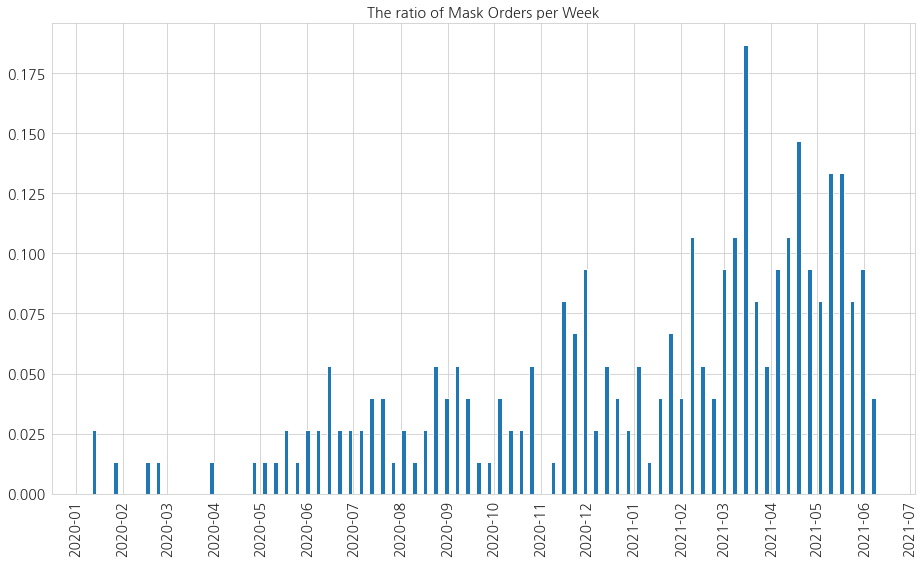

In [15]:
# fig, ax = plt.subplots(figsize = (20, 10))
plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax = plt.bar(tmp_group['dateindex'], tmp_group['buy']/len(df), width=3)
plt.xticks(rotation=90)
plt.title('The ratio of Mask Orders per Week')
plt.tight_layout()
plt.show()

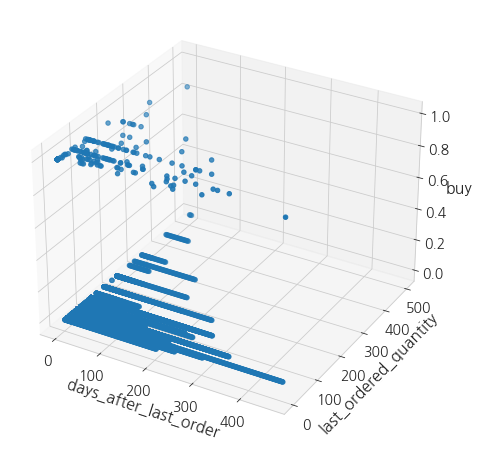

In [16]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(df_augmented['days_after_last_order'], df_augmented['last_ordered_quantity'], df_augmented['buy'])
ax.set_xlabel('days_after_last_order')
ax.set_ylabel('last_ordered_quantity')
ax.set_zlabel('buy')
plt.show()

# 모델링 데이터 준비

In [17]:
# 모델링 데이터
modeling_columns = ['sex', 'age', 'urban', 'membership', 'orderCycle', 'remainder', 'orderQuantity', 
                    'n=1', 'n=7', 'n=14', 'n=30', 'n=60', 'n=90', 'last_ordered_quantity', 'days_after_last_order', 'case']
df_model_unscaled = df_augmented[modeling_columns] # 'month', 'weeknumber', 'dateindex', 

df_model = df_model_unscaled.copy()
for col in ['age', 'orderCycle', 'remainder', 'orderQuantity', 'n=1', 'n=7', 'n=14', 'n=30', 'n=60', 'n=90', 'case', 'last_ordered_quantity', 'days_after_last_order',]:
    df_model[col] = (df_model[col] - df_model[col].min())/(df_model[col].max() - df_model[col].min())

# k-fold cross-validation 함수

In [18]:
# 모델링 및 성능 비교를 위함 (5-fold cross validation 수행)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score


def get_score(y, y_score):
    auc = roc_auc_score(y, y_score)
    ap = average_precision_score(y, y_score)
    return auc, ap

def kfold_cross_validation(X, y, n_fold=5, seed=42):

    names = [
        "3-Nearest Neighbor",
        "5-Nearest Neighbor",
        "Linear SVM",
        "RBF SVM",
        "Poly SVM",
        "Decision Tree3",
        "Decision Tree5",
        "Random Forest10",
        "Random Forest50",
        "Neural Net10",
        "Neural Net50",
        "Neural Net100",
    ]

    classifiers = [
        KNeighborsClassifier(3),
        KNeighborsClassifier(5),
        SVC(kernel="linear", C=1),
        SVC(kernel="rbf", gamma='scale', C=1),
        SVC(kernel="poly", gamma='scale', C=1),
        DecisionTreeClassifier(max_depth=3, random_state=seed),
        DecisionTreeClassifier(max_depth=5, random_state=seed),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        RandomForestClassifier(max_depth=5, n_estimators=50, max_features=1),
        MLPClassifier(hidden_layer_sizes=(10,), alpha=1, max_iter=1000, random_state=seed),
        MLPClassifier(hidden_layer_sizes=(50,), alpha=1, max_iter=1000, random_state=seed),
        MLPClassifier(hidden_layer_sizes=(100,), alpha=1, max_iter=1000, random_state=seed),
    ]

    skf = StratifiedKFold(n_splits=n_fold, random_state=seed, shuffle=True)
    skf.get_n_splits(X, y)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        trn_auc_scores = []
        tst_auc_scores = []
        trn_ap_scores = []
        tst_ap_scores = []
        for fold_no, (train_index, test_index) in enumerate(skf.split(X, y)):
            # Define Dataset
            trn_X, tst_X, trn_Y, tst_Y = \
            X[train_index], X[test_index], y[train_index], y[test_index]

            clf.fit(trn_X, trn_Y)
            trn_Y_score = clf.predict(trn_X)
            tst_Y_score = clf.predict(tst_X)
            trn_auc, trn_ap = get_score(trn_Y, trn_Y_score)
            tst_auc, tst_ap = get_score(tst_Y, tst_Y_score)
            trn_auc_scores.append(trn_auc)
            tst_auc_scores.append(tst_auc)
            trn_ap_scores.append(trn_ap)
            tst_ap_scores.append(tst_ap)
        print('{} | AP: (TRN) {:.2f} (TST) {:.2f} | AUC: (TRN) {:.2f} (TST) {:.2f}'
              .format(name, np.mean(trn_ap_scores), np.mean(tst_ap_scores), np.mean(trn_auc_scores), np.mean(tst_auc_scores)))

# Modeling with all input variables

In [19]:
X = df_model.values
y = df_augmented['buy'].values
print(df_augmented.shape, X.shape, y.shape)
print(y.sum() / len(y), '<<--- severe class imbalance')

kfold_cross_validation(X, y)

(18761, 29) (18761, 16) (18761,)
0.012792495069559193 <<--- severe class imbalance
3-Nearest Neighbor | AP: (TRN) 0.08 (TST) 0.03 | AUC: (TRN) 0.54 (TST) 0.51
5-Nearest Neighbor | AP: (TRN) 0.03 (TST) 0.03 | AUC: (TRN) 0.51 (TST) 0.51
Linear SVM | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
RBF SVM | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Poly SVM | AP: (TRN) 0.02 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Decision Tree3 | AP: (TRN) 0.33 (TST) 0.32 | AUC: (TRN) 0.66 (TST) 0.66
Decision Tree5 | AP: (TRN) 0.33 (TST) 0.32 | AUC: (TRN) 0.66 (TST) 0.66
Random Forest10 | AP: (TRN) 0.15 (TST) 0.15 | AUC: (TRN) 0.57 (TST) 0.57
Random Forest50 | AP: (TRN) 0.31 (TST) 0.30 | AUC: (TRN) 0.65 (TST) 0.65
Neural Net10 | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Neural Net50 | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Neural Net100 | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50


- Tree 계열 모델 (Decision Tree, Random Forest) 제외하면 학습 자체가 안됨을 확인 가능
- 변수 선택이 중요하다는 사실을 알 수 있음
- Random Forest 모델을 사용해 feature importance 확인

# 모델 examination: Random Forest

AUC: 0.85 | AP: 0.48


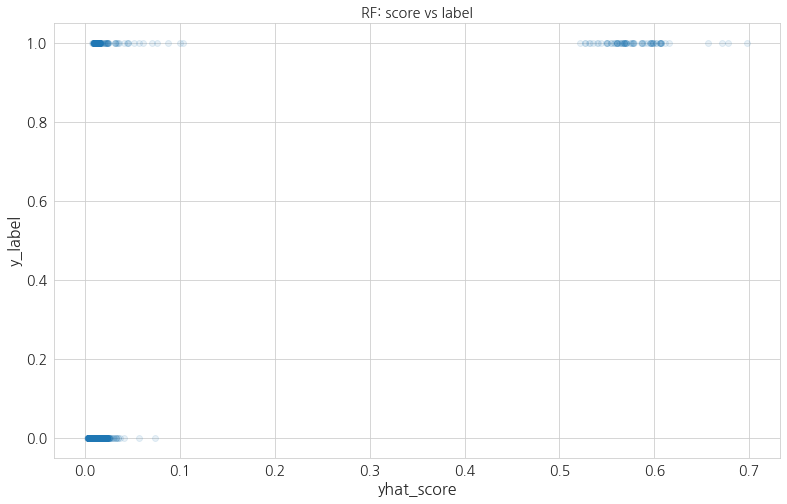

In [20]:
clf = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)
clf.fit(df_model.values, y)
yhat = clf.predict_proba(df_model.values)[:, 1]
print('AUC: {:.2f} | AP: {:.2f}'.format(*get_score(y, yhat)))

plt.scatter(yhat, y, alpha=0.1)
plt.title('RF: score vs label')
plt.xlabel('yhat_score')
plt.ylabel('y_label')
plt.show()

# Random Forest: Feature importance

days_after_last_order 0.4497946318819929
last_ordered_quantity 0.36232940755093074
case 0.041432937953951636
age 0.023269821689141667
n=60 0.0207232772338047
orderCycle 0.018338880820653564
orderQuantity 0.016260199846834127
n=90 0.015661091494446236
remainder 0.013636498100379256
n=30 0.012354850859299452
n=7 0.009200687566710027
n=14 0.005369414311216872
n=1 0.00441622821302645
urban 0.0038296762971700813
sex 0.0019757236303017795
membership 0.0014066725501405502


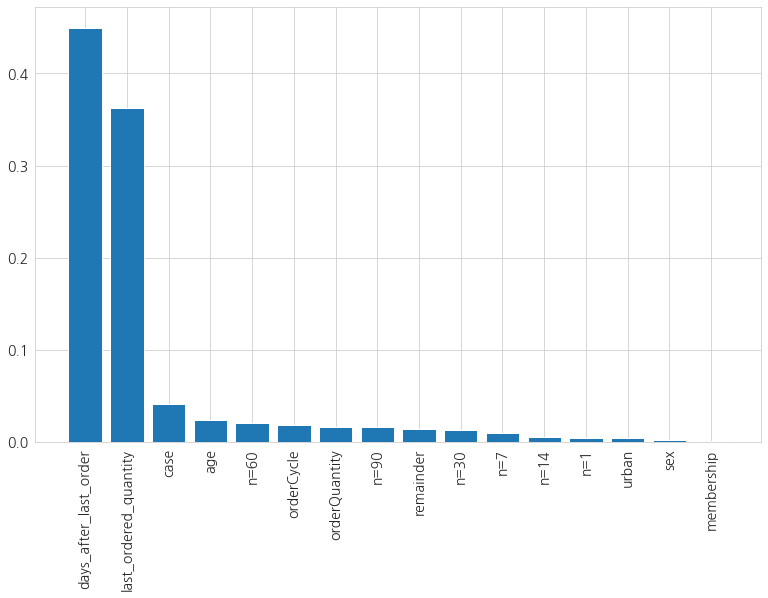

In [21]:
indices = np.argsort(-clf.feature_importances_)
for i in indices:
    print(df_model.columns[i], clf.feature_importances_[i])
plt.bar(df_model.columns[indices], clf.feature_importances_[indices])
plt.xticks(rotation=90)
plt.show()

- 두 변수 (`days_after_last_order`, `last_ordered_quantity`)가 가장 중요함을 알 수 있음

# Modeling with the two most important variables

In [22]:
X = df_model[['last_ordered_quantity', 'days_after_last_order']].values
y = df_augmented['buy'].values
print(df_augmented.shape, X.shape, y.shape)
print(y.sum() / len(y), '<<--- severe class imbalance')

kfold_cross_validation(X, y)

(18761, 29) (18761, 2) (18761,)
0.012792495069559193 <<--- severe class imbalance
3-Nearest Neighbor | AP: (TRN) 0.31 (TST) 0.29 | AUC: (TRN) 0.66 (TST) 0.66
5-Nearest Neighbor | AP: (TRN) 0.32 (TST) 0.32 | AUC: (TRN) 0.66 (TST) 0.66
Linear SVM | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
RBF SVM | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Poly SVM | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Decision Tree3 | AP: (TRN) 0.33 (TST) 0.32 | AUC: (TRN) 0.66 (TST) 0.66
Decision Tree5 | AP: (TRN) 0.33 (TST) 0.32 | AUC: (TRN) 0.66 (TST) 0.66
Random Forest10 | AP: (TRN) 0.33 (TST) 0.32 | AUC: (TRN) 0.66 (TST) 0.66
Random Forest50 | AP: (TRN) 0.33 (TST) 0.32 | AUC: (TRN) 0.66 (TST) 0.66
Neural Net10 | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Neural Net50 | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50
Neural Net100 | AP: (TRN) 0.01 (TST) 0.01 | AUC: (TRN) 0.50 (TST) 0.50


- hmm....

# 모델 examination: Decision Tree

AUC: 0.50 | AP: 0.01


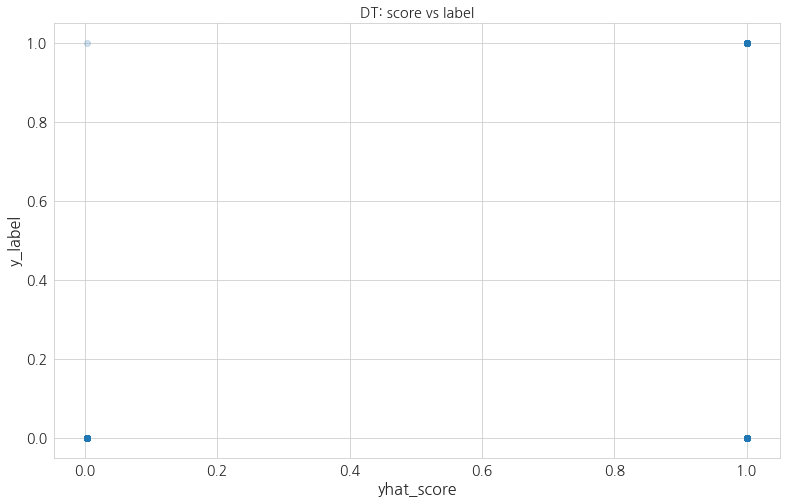

In [23]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(df_model_unscaled.values, y)
yhat = clf.predict_proba(df_model.values)[:, 1]
print('AUC: {:.2f} | AP: {:.2f}'.format(*get_score(y, yhat)))

plt.scatter(yhat, y, alpha=0.1)
plt.title('DT: score vs label')
plt.xlabel('yhat_score')
plt.ylabel('y_label')
plt.show()

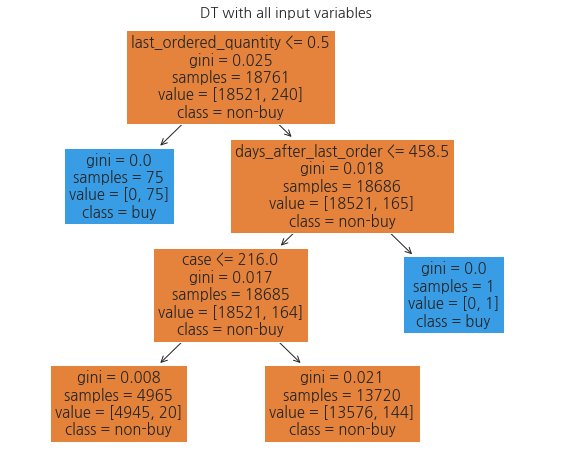

In [24]:
from sklearn import tree

fig, axes = plt.subplots(figsize=(10, 8))
tree.plot_tree(clf,feature_names=df_model.columns, class_names=['non-buy', 'buy'], filled = True)
plt.title('DT with all input variables')
plt.show()

### ★★★★★★★★★★★ 사람 별로 최초 구매시 'days_after_last_ordered' 변수값이 0이어서 이 기준으로 분류를 하고 있었음........ 
### 엄밀하게 따지면 해당 데이터 (최초 구매 datapoints)들을 제거해줘야 맞음!!!!

# 사람별 최초 구매 datapoints (days_after_last_order == 0인 데이터) 제거하고 재확인

In [25]:
# 사람별 최초 구매 datapoints (days_after_last_order == 0인 데이터) 제거
X_valid = df_model_unscaled[df_model_unscaled.days_after_last_order != 0].values
y_valid = df_augmented.loc[df_model_unscaled.days_after_last_order != 0, 'buy']
print(X_valid.shape, y_valid.shape, y_valid.sum(), y_valid.sum()/ len(y_valid))

(18686, 16) (18686,) 165 0.008830140211923364


AUC: 0.63 | AP: 0.02


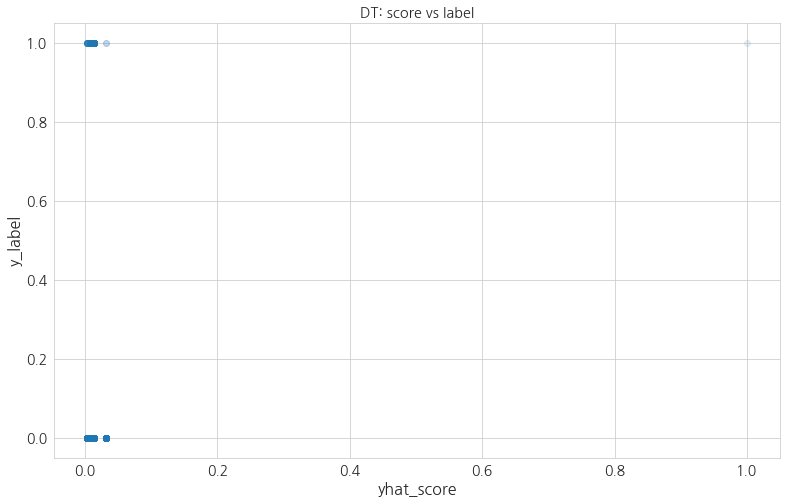

In [26]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_valid, y_valid)
yhat = clf.predict_proba(X_valid)[:, 1]
print('AUC: {:.2f} | AP: {:.2f}'.format(*get_score(y_valid, yhat)))

plt.scatter(yhat, y_valid, alpha=0.1)
plt.title('DT: score vs label')
plt.xlabel('yhat_score')
plt.ylabel('y_label')
plt.show()

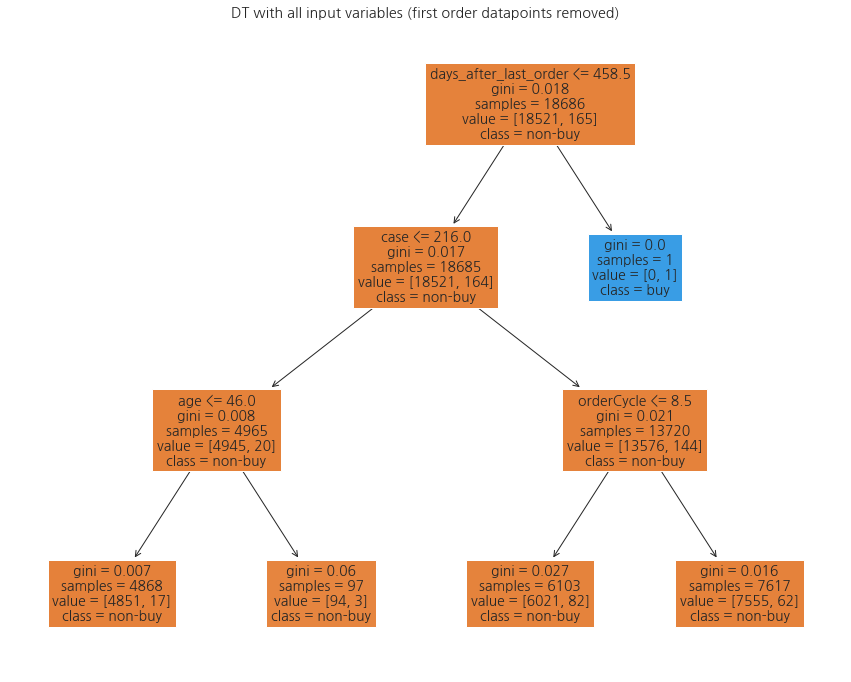

In [27]:
from sklearn import tree

fig, axes = plt.subplots(figsize=(15, 12))
tree.plot_tree(clf,feature_names=df_model.columns, class_names=['non-buy', 'buy'], filled = True)
plt.title('DT with all input variables (first order datapoints removed)')
plt.show()

AUC: 0.85 | AP: 0.21
days_after_last_order 0.3140732112878148
case 0.13247314784168476
n=90 0.07240180550443252
age 0.06103556528325746
n=30 0.05822487817905868
n=60 0.0554004283339475
last_ordered_quantity 0.054933934931569714
n=14 0.04152188827371661
orderCycle 0.04126483618666024
n=7 0.04049847654023862
orderQuantity 0.03963718259301267
remainder 0.027787109693817008
n=1 0.02027569648944569
urban 0.017490670646924746
membership 0.011897769553872235
sex 0.011083398660546901


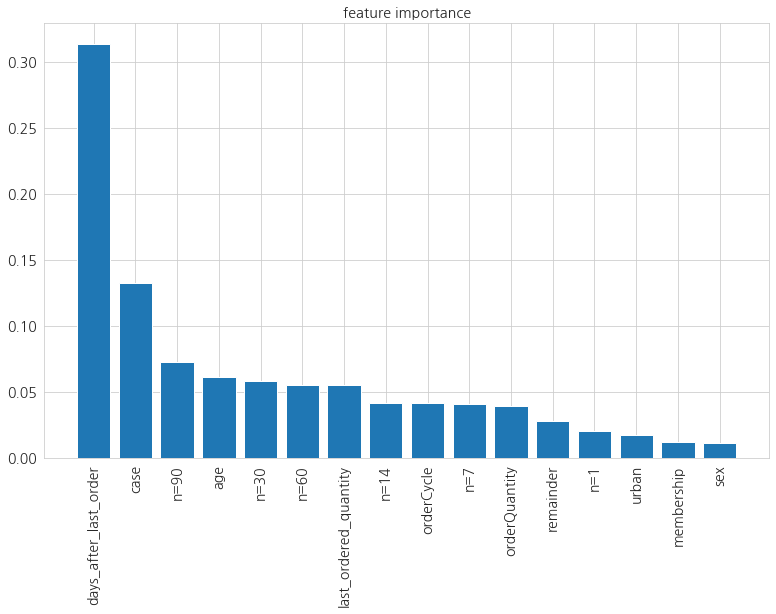

In [28]:
clf = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)
clf.fit(X_valid, y_valid)
yhat = clf.predict_proba(X_valid)[:, 1]
print('AUC: {:.2f} | AP: {:.2f}'.format(*get_score(y_valid, yhat)))

indices = np.argsort(-clf.feature_importances_)
for i in indices:
    print(df_model.columns[i], clf.feature_importances_[i])
plt.bar(df_model.columns[indices], clf.feature_importances_[indices])
plt.xticks(rotation=90)
plt.title('feature importance')
plt.show()

# 모델 examination: Multi-layer Perceptron
- `last_ordered_quantity`, `case` 변수만 사용

AUC: 0.64 | AP: 0.33


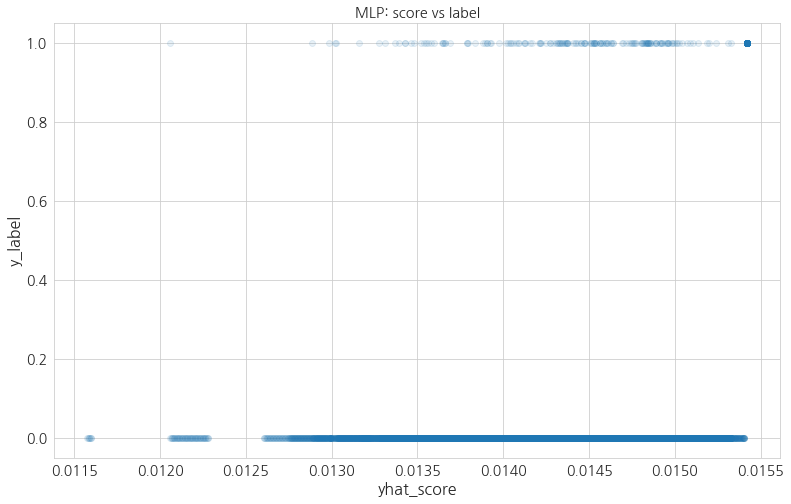

In [29]:
seed = 42
clf = MLPClassifier(hidden_layer_sizes=(5,), alpha=1, max_iter=1000, random_state=seed)
clf.fit(df_model[['last_ordered_quantity', 'case']], y)
yhat = clf.predict_proba(df_model[['last_ordered_quantity', 'days_after_last_order']])[:, 1]
print('AUC: {:.2f} | AP: {:.2f}'.format(*get_score(y, yhat)))

plt.scatter(yhat, y, alpha=0.1)
plt.title('MLP: score vs label')
plt.xlabel('yhat_score')
plt.ylabel('y_label')
plt.show()